In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


In [5]:
houseprice = pd.read_csv('data/Ames_HousePrice_cleaned.csv')
houseprice

x_train = pd.read_csv('data/x_train_dummies.csv')
x_test = pd.read_csv('data/x_test_dummies.csv')
y_train = pd.read_csv('data/y_train_dummies.csv')
y_test = pd.read_csv('data/y_test_dummies.csv')

# exclude PIDs from analysis 
x_train = x_train.iloc[:,1:]
x_test = x_test.iloc[:,1:]

# Log Sale Price 
y_train = np.log(y_train['SalePrice'])
y_test = np.log(y_test['SalePrice'])

### `Lasso Regression`

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

# ss = StandardScaler()
# xtrain_scalar = ss.fit_transform(x_train)

alphas = np.logspace(-5,5,50)
lassocv = LassoCV(cv=8, max_iter =100000, normalize=True, random_state=0)
coefs_lassocv = [] 
result = {}
# trainscore = [] 
# testscore = [] 

for alpha in alphas:
    lassocv.fit(x_train.iloc[:,1:], y_train)
    coefs_lassocv.append(lassocv.coef_)
    result[alpha] = lassocv.score(x_test.iloc[:, 1:], y_test)

result
# alpha_best = lassocv.alpha_
# lassocv_coefs = lassocv.coef_


# trainscore.append(lassocv.score(x_train.iloc[:,1:], y_train))
# testscore.append(lassocv.score(x_test.iloc[:,1:], y_test))

# print('Best alpha: {}'.format(lassocv.alpha_))
# print('Train Score: {}'.format(trainscore))
# print('Test Score: {}'.format(testscore))

# the Lasso CV model provided the same scores as non CV Lasso 

# lasso=Lasso()
# alphas = np.logspace(-2,3,50)
# lasso.set_params(normalize=True)
# coefs_lasso = [] 
# result = {} 

# for alpha in alphas:
#    lasso.set_params(alpha = alpha)
#    lasso.fit(x_train.iloc[:,1:], y_train)
#    coefs_lasso.append(lasso.coef_)
#    result[alpha] = lasso.score(x_test.iloc[:, 1:], y_test)

# result

{1e-05: 0.9306245094823309,
 1.5998587196060572e-05: 0.9306245094823309,
 2.559547922699533e-05: 0.9306245094823309,
 4.094915062380427e-05: 0.9306245094823309,
 6.55128556859551e-05: 0.9306245094823309,
 0.00010481131341546853: 0.9306245094823309,
 0.00016768329368110083: 0.9306245094823309,
 0.0002682695795279727: 0.9306245094823309,
 0.00042919342601287783: 0.9306245094823309,
 0.0006866488450042998: 0.9306245094823309,
 0.0010985411419875584: 0.9306245094823309,
 0.001757510624854793: 0.9306245094823309,
 0.002811768697974231: 0.9306245094823309,
 0.004498432668969444: 0.9306245094823309,
 0.0071968567300115215: 0.9306245094823309,
 0.011513953993264481: 0.9306245094823309,
 0.018420699693267165: 0.9306245094823309,
 0.029470517025518096: 0.9306245094823309,
 0.04714866363457394: 0.9306245094823309,
 0.07543120063354623: 0.9306245094823309,
 0.1206792640639329: 0.9306245094823309,
 0.19306977288832497: 0.9306245094823309,
 0.30888435964774846: 0.9306245094823309,
 0.494171336132383

In [7]:
coefs_lassocv = pd.DataFrame(coefs_lassocv, index=alphas, columns=x_train.columns[1:])
coefs_lassocv.head()


LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0.000010  0.000002      0.06252     0.045528   0.001684           0.0   
0.000016  0.000002      0.06252     0.045528   0.001684           0.0   
0.000026  0.000002      0.06252     0.045528   0.001684           0.0   
0.000041  0.000002      0.06252     0.045528   0.001684           0.0   
0.000066  0.000002      0.06252     0.045528   0.001684           0.0   

          MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  \
0.000010    0.000018    0.000077    0.000039     0.000076  0.000256  ...   
0.000016    0.000018    0.000077    0.000039     0.000076  0.000256  ...   
0.000026    0.000018    0.000077    0.000039     0.000076  0.000256  ...   
0.000041    0.000018    0.000077    0.000039     0.000076  0.000256  ...   
0.000066    0.000018    0.000077    0.000039     0.000076  0.000256  ...   

              pd_P      pd_Y  sc_AdjLand  sc_Alloca  sc_Family  sc_Normal  \
0.000010  0.002918  0.037485         0.0   0.060107  -0.028812   0.076151   
0.000016  0.002918  0.037485         0.0   0.060107  -0.028812   0.076151   
0.000026  0.002918  0.037485         0.0   0.060107  -0.028812   0.076151   
0.000041  0.002918  0.037485         0.0   0.060107  -0.028812   0.076151   
0.000066  0.002918  0.037485         0.0   0.060107  -0.028812   0.076151   

          sc_Partial  el_FuseF  el_FuseP  el_SBrkr  
0.000010    0.105103       0.0  0.004866      -0.0  
0.000016    0.105103       0.0  0.004866      -0.0  
0.000026    0.105103       0.0  0.004866      -0.0  
0.000041    0.105103       0.0  0.004866      -0.0  
0.000066    0.105103       0.0  0.004866      -0.0  

[5 rows x 152 columns]

In [8]:
lassocv.alpha_

2.6468350448360914e-05

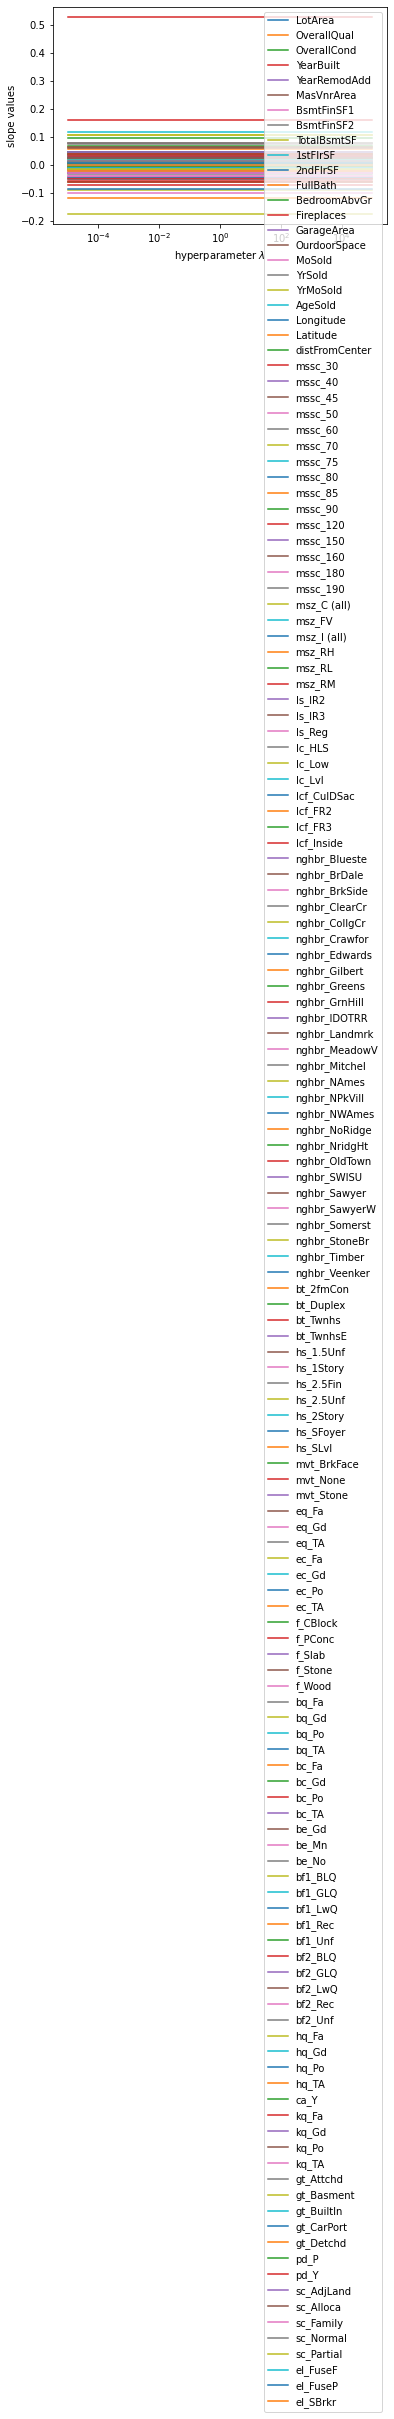

In [27]:
for name in coefs_lassocv.columns:
    plt.plot(coefs_lassocv.index, coefs_lassocv[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.xscale('log')
plt.ylabel(r'slope values')
plt.legend(loc=1)

In [14]:
lasso=Lasso(max_iter= 10000)
alphas = np.logspace(-5,2,50)
lasso.set_params(normalize=True)
coefs_lasso = [] 
result = {} 

for alpha in alphas:
   lasso.set_params(alpha = alpha)
   lasso.fit(x_train.iloc[:,1:], y_train)
   coefs_lasso.append(lasso.coef_)
   result[alpha] = lasso.score(x_test.iloc[:, 1:], y_test)

result
# best alpha  3.7e-05

{1e-05: 0.9294875907906128,
 1.3894954943731388e-05: 0.9299198456598781,
 1.9306977288832496e-05: 0.9302951166522725,
 2.6826957952797274e-05: 0.9306361045940073,
 3.727593720314938e-05: 0.930688238676538,
 5.1794746792312125e-05: 0.93014972132319,
 7.196856730011514e-05: 0.9294036528401168,
 0.0001: 0.927982349413892,
 0.00013894954943731373: 0.9246975763601716,
 0.00019306977288832496: 0.9193024819115774,
 0.00026826957952797245: 0.9120440188488551,
 0.0003727593720314938: 0.9030673180584203,
 0.0005179474679231213: 0.8883986606157925,
 0.0007196856730011514: 0.8649693044473971,
 0.001: 0.8321306403169969,
 0.0013894954943731374: 0.7814060205382493,
 0.0019306977288832496: 0.7143142087572104,
 0.0026826957952797246: 0.6351112399715844,
 0.003727593720314938: 0.5086087872275736,
 0.005179474679231208: 0.3433854628377262,
 0.007196856730011514: 0.05442949283158893,
 0.01: -0.003894032334869957,
 0.013894954943731374: -0.003894032334869957,
 0.019306977288832496: -0.003894032334869957,


In [ ]:
coefs_lasso

In [15]:
coefs_lasso = pd.DataFrame(coefs_lasso, index=alphas, columns = x_train.columns[1:])
coefs_lasso.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0.000010  0.000002     0.058989     0.046389   0.001709           0.0   
0.000014  0.000002     0.059813     0.046229   0.001712           0.0   
0.000019  0.000002     0.061056     0.045912   0.001702           0.0   
0.000027  0.000002     0.062584     0.045508   0.001683           0.0   
0.000037  0.000002     0.064445     0.044689   0.001653           0.0   

          MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  \
0.000010    0.000019    0.000074    0.000062     0.000072  0.000263  ...   
0.000014    0.000019    0.000075    0.000057     0.000073  0.000262  ...   
0.000019    0.000018    0.000076    0.000049     0.000074  0.000259  ...   
0.000027    0.000018    0.000077    0.000039     0.000076  0.000256  ...   
0.000037    0.000017    0.000077    0.000026     0.000082  0.000252  ...   

              pd_P      pd_Y  sc_AdjLand  sc_Alloca  sc_Family  sc_Normal  \
0.000010  0.011642  0.042854    0.020409   0.076764  -0.024706   0.086730   
0.000014  0.009185  0.041334    0.007880   0.072212  -0.026273   0.084097   
0.000019  0.006281  0.039491    0.000000   0.067018  -0.027792   0.080646   
0.000027  0.002757  0.037393    0.000000   0.059780  -0.028815   0.075935   
0.000037  0.000000  0.035193    0.000000   0.048364  -0.029182   0.069346   

          sc_Partial  el_FuseF  el_FuseP  el_SBrkr  
0.000010    0.114851  0.006652  0.025334      -0.0  
0.000014    0.112726  0.003560  0.020163      -0.0  
0.000019    0.109784  0.000000  0.013358      -0.0  
0.000027    0.104857  0.000000  0.004426      -0.0  
0.000037    0.097532  0.000000  0.000000      -0.0  

[5 rows x 152 columns]

Text(0, 0.5, 'slope values')

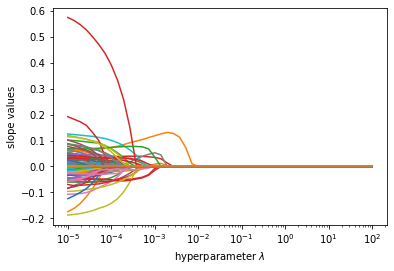

In [28]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.xscale('log')
plt.ylabel(r'slope values')


### `Ridge Regression`

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


0    11.856515
1    12.086726
2    12.072541
3    12.382125
4    12.323856
Name: SalePrice, dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

ridge_alphas = np.logspace(-2, 5, 100)
ridgecv = RidgeCV(alphas = ridge_alphas, cv = 8, normalize=True)

trainscore = [] 
testscore = [] 

ridgecv.fit(x_train, y_train)

ralpha_best = ridgecv.alpha_
coefs = ridgecv.coef_

trainscore.append(ridgecv.score(x_train, y_train))
testscore.append(ridgecv.score(x_test, y_test))

print('Best alpha: {}'.format(ralpha_best))
print('Train Score: {}'.format(trainscore))
print('Test Score: {}'.format(testscore))

# why are the Ridge CV results so different from the regular ridge regression results?


Best alpha: 0.05994842503189409
Train Score: [0.9246773315914495]
Test Score: [0.9306960465938301]


In [19]:
alpha2 = np.arange(0,20)
ridge = Ridge()
ridge.set_params(normalize=False)
coefs_ridge = [] 
results = {}

for alpha in alpha2: 
    ridge.set_params(alpha=alpha)
    ridge.fit(x_train.iloc[:,1:], y_train)
    coefs_ridge.append(ridge.coef_)
    results[alpha] = ridge.score(x_test.iloc[:,1:], y_test)

coefs_ridge = pd.DataFrame(coefs_ridge, index = alpha2, columns = x_train.columns[1:])
coefs_ridge.head()



LotArea  OverallQual  OverallCond  YearBuilt   YearRemodAdd  MasVnrArea  \
0  0.000002     0.057013     0.047290   0.001767  760650.921442    0.000020   
1  0.000002     0.057911     0.046975   0.001732      -0.000415    0.000024   
2  0.000002     0.058819     0.046965   0.001755      -0.000418    0.000025   
3  0.000002     0.059583     0.047029   0.001780      -0.000420    0.000026   
4  0.000002     0.060246     0.047123   0.001805      -0.000420    0.000026   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...      pd_P      pd_Y  \
0    0.000070    0.000067     0.000062  0.000270  ...  0.016991  0.044967   
1    0.000072    0.000067     0.000066  0.000269  ...  0.016737  0.045633   
2    0.000073    0.000067     0.000068  0.000269  ...  0.016858  0.045485   
3    0.000073    0.000067     0.000070  0.000269  ...  0.016793  0.045091   
4    0.000074    0.000067     0.000071  0.000268  ...  0.016614  0.044606   

   sc_AdjLand  sc_Alloca  sc_Family  sc_Normal  sc_Partial  el_FuseF  \
0    0.050139   0.095832  -0.018033   0.091860    0.119562  0.014634   
1    0.018758   0.062804  -0.023383   0.089794    0.112347  0.009547   
2    0.010850   0.045892  -0.025150   0.086171    0.106163  0.008102   
3    0.007128   0.035938  -0.026040   0.082852    0.100881  0.007319   
4    0.004991   0.029400  -0.026446   0.079843    0.096243  0.006772   

   el_FuseP  el_SBrkr  
0  0.047416  0.001677  
1  0.027566 -0.000823  
2  0.020243 -0.001300  
3  0.015787 -0.001578  
4  0.012658 -0.001778  

[5 rows x 152 columns]

In [20]:
ridge.coef_

array([ 1.87405357e-06,  6.54294860e-02,  4.85470591e-02,  2.03775063e-03,
       -4.00587946e-04,  3.41568098e-05,  7.42822196e-05,  6.72021784e-05,
        7.97434081e-05,  2.69298726e-04,  2.69030962e-04,  1.82427171e-03,
       -5.96409705e-03,  3.31118730e-02,  1.44722976e-04,  6.96364802e-05,
       -1.27525551e-03, -1.19674203e-03, -1.30292403e-03, -9.02424650e-04,
        1.61994584e-03, -4.52008429e-03, -2.06102457e-03, -3.89928571e-02,
       -2.67980591e-04, -1.87913580e-03,  2.09275429e-02,  5.59297136e-04,
        2.85760943e-02,  1.43111515e-02, -2.42963808e-04,  1.41297080e-02,
       -2.60416153e-02, -2.66617332e-03, -5.40322675e-03, -5.22877684e-02,
       -1.39127368e-02, -4.91717778e-03, -5.21772661e-02,  3.34300472e-02,
       -4.64066764e-04, -2.66264346e-03,  3.72623820e-02, -1.77910595e-02,
        1.19021730e-02,  3.52916297e-03,  5.75832438e-03,  3.92915839e-02,
        1.30091052e-02,  2.89232517e-02,  1.95615106e-02, -1.66890593e-02,
       -1.37686116e-02, -

In [21]:
results
# highest R^2 observed when alpha =  ~8

{0: -3.174235713391601e+16,
 1: 0.9293447592935663,
 2: 0.9297478635495385,
 3: 0.9299696399575593,
 4: 0.9301048705178288,
 5: 0.9301857589953564,
 6: 0.9302289332884885,
 7: 0.9302446349645503,
 8: 0.9302397419091417,
 9: 0.9302191105517313,
 10: 0.9301862862162527,
 11: 0.9301439210387938,
 12: 0.9300940371598436,
 13: 0.9300382004756647,
 14: 0.9299776394181714,
 15: 0.9299133284006809,
 16: 0.9298460477571326,
 17: 0.9297764276067905,
 18: 0.9297049804735332,
 19: 0.9296321258845855}

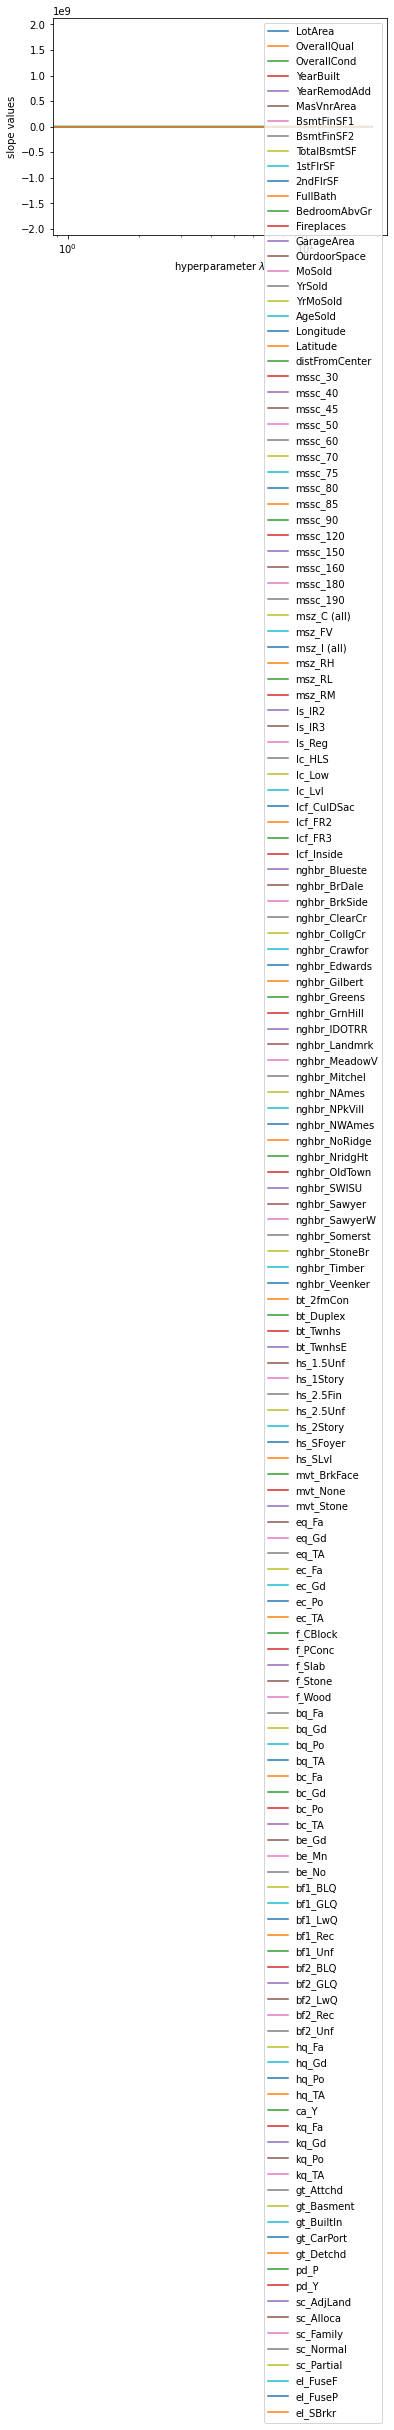

In [31]:
# plotting 
for name in coefs_ridge.columns:
    plt.plot(coefs_ridge.index, coefs_ridge[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.xscale('log')
plt.ylabel(r'slope values')
plt.legend(loc=1)

# Now not all the lines are appearing?

In [23]:
coefs_ridge

LotArea  OverallQual  OverallCond  YearBuilt   YearRemodAdd  MasVnrArea  \
0   0.000002     0.057013     0.047290   0.001767  760650.921442    0.000020   
1   0.000002     0.057911     0.046975   0.001732      -0.000415    0.000024   
2   0.000002     0.058819     0.046965   0.001755      -0.000418    0.000025   
3   0.000002     0.059583     0.047029   0.001780      -0.000420    0.000026   
4   0.000002     0.060246     0.047123   0.001805      -0.000420    0.000026   
5   0.000002     0.060832     0.047228   0.001828      -0.000419    0.000027   
6   0.000002     0.061358     0.047337   0.001850      -0.000418    0.000028   
7   0.000002     0.061835     0.047447   0.001870      -0.000417    0.000028   
8   0.000002     0.062270     0.047556   0.001889      -0.000416    0.000029   
9   0.000002     0.062669     0.047662   0.001907      -0.000414    0.000030   
10  0.000002     0.063038     0.047766   0.001924      -0.000413    0.000030   
11  0.000002     0.063379     0.047866   0.001939      -0.000411    0.000031   
12  0.000002     0.063697     0.047962   0.001954      -0.000410    0.000031   
13  0.000002     0.063994     0.048056   0.001968      -0.000409    0.000032   
14  0.000002     0.064271     0.048145   0.001981      -0.000407    0.000032   
15  0.000002     0.064531     0.048232   0.001994      -0.000406    0.000033   
16  0.000002     0.064776     0.048315   0.002005      -0.000404    0.000033   
17  0.000002     0.065006     0.048396   0.002017      -0.000403    0.000033   
18  0.000002     0.065224     0.048473   0.002027      -0.000402    0.000034   
19  0.000002     0.065429     0.048547   0.002038      -0.000401    0.000034   

    BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...      pd_P      pd_Y  \
0     0.000070    0.000067     0.000062  0.000270  ...  0.016991  0.044967   
1     0.000072    0.000067     0.000066  0.000269  ...  0.016737  0.045633   
2     0.000073    0.000067     0.000068  0.000269  ...  0.016858  0.045485   
3     0.000073    0.000067     0.000070  0.000269  ...  0.016793  0.045091   
4     0.000074    0.000067     0.000071  0.000268  ...  0.016614  0.044606   
5     0.000074    0.000067     0.000072  0.000268  ...  0.016369  0.044088   
6     0.000074    0.000067     0.000073  0.000268  ...  0.016084  0.043561   
7     0.000074    0.000068     0.000074  0.000268  ...  0.015777  0.043039   
8     0.000074    0.000068     0.000075  0.000268  ...  0.015459  0.042526   
9     0.000074    0.000068     0.000075  0.000268  ...  0.015136  0.042026   
10    0.000074    0.000068     0.000076  0.000268  ...  0.014813  0.041541   
11    0.000074    0.000068     0.000076  0.000268  ...  0.014493  0.041071   
12    0.000074    0.000068     0.000077  0.000268  ...  0.014177  0.040616   
13    0.000074    0.000068     0.000077  0.000269  ...  0.013868  0.040176   
14    0.000074    0.000068     0.000078  0.000269  ...  0.013567  0.039750   
15    0.000074    0.000068     0.000078  0.000269  ...  0.013272  0.039337   
16    0.000074    0.000068     0.000079  0.000269  ...  0.012986  0.038938   
17    0.000074    0.000067     0.000079  0.000269  ...  0.012709  0.038552   
18    0.000074    0.000067     0.000079  0.000269  ...  0.012439  0.038178   
19    0.000074    0.000067     0.000080  0.000269  ...  0.012178  0.037815   

    sc_AdjLand  sc_Alloca  sc_Family  sc_Normal  sc_Partial  el_FuseF  \
0     0.050139   0.095832  -0.018033   0.091860    0.119562  0.014634   
1     0.018758   0.062804  -0.023383   0.089794    0.112347  0.009547   
2     0.010850   0.045892  -0.025150   0.086171    0.106163  0.008102   
3     0.007128   0.035938  -0.026040   0.082852    0.100881  0.007319   
4     0.004991   0.029400  -0.026446   0.079843    0.096243  0.006772   
5     0.003618   0.024789  -0.026558   0.077100    0.092103  0.006337   
6     0.002671   0.021370  -0.026482   0.074584    0.088366  0.005969   
7     0.001983   0.018739  -0.026281   0.072262    0.084964  0.005644   
8     0.001464   0.016655  -

### `Elastic Net`

A hybrid penalized model which has two hyperparameters (alpha & rho). 
Alpha: equivalence of lambda, and controls the regularization strength
Rho: controls which mixture of Ridge and Lasso to use 


In [135]:
# reading csv file 
cl_x = pd.read_csv('../data/Ames_X2.csv')
cl_y = pd.read_csv('../data/Ames_Y2.csv')

cl_x = cl_x.drop(['Unnamed: 0'], axis=1)
cl_y = cl_y.drop(['Unnamed: 0'], axis=1)

cl_x_dummies = pd.get_dummies(cl_x, drop_first=True)
cl_x_dummies = cl_x_dummies.fillna(0)


x_train, x_test, y_train, y_test = train_test_split(cl_x_dummies, cl_y, test_size = 0.3, random_state = 0)

y_train =np.log(y_train['SalePrice'])
y_train

y_test = np.log(y_test['SalePrice'])
y_test 


841     11.608236
2329    11.289782
936     11.867799
618     12.278393
1801    12.365211
          ...    
2226    11.849398
1000    12.533576
655     12.149502
2090    12.144197
553     11.320554
Name: SalePrice, Length: 772, dtype: float64

In [144]:
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# n_rho = 10
# n_alpha = 50
# alpha_range = np.logspace(-4, 2, n_alpha)
# rho_range = np.linspace(0, 1, n_rho) 
# scores = np.zeros((n_rho, n_alpha))

scaler = StandardScaler().fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

elasticnet = ElasticNet(max_iter=10000, tol=0.01, normalize=True)

# for alphaIdx, alpha in enumerate(alpha_range):
#     for rhoIdx, rho in enumerate(rho_range):
#         elasticnet.set_params(alpha=alpha, l1_ratio=rho)
#         elasticnet.fit(x_train, y_train)
#         scores[rhoIdx, alphaIdx] = elasticnet.score(x_test, y_test)

# elastic net grid 
enet_grid = [{
    'alpha': list(np.logspace(-6, 2, 100)), 
    'l1_ratio': list(np.linspace(0, 1, 10)),
}]

# set cv parameters 
enet_cv = GridSearchCV(elasticnet, enet_grid, cv = 5, scoring='r2', n_jobs=-1)

enet_cv.fit(x_train_sc, y_train)

print(f'Enet Grid Search R2 of Train set: {enet_cv.score(x_train_sc, y_train)}')
print(f'Enet Grid Search R2 of Test set: {enet_cv.score(x_test_sc, y_test)}')
print(f'Enet Grid Search Parameters: {enet_cv.best_params_}')

/Users/michellebui/opt/anaconda3/envs/py3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/Users/michellebui/opt/anaconda3/envs/py3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize

Enet Grid Search R2 of Train set: 0.8978068268351599
Enet Grid Search R2 of Test set: 0.9061802721067682
Enet Grid Search Parameters: {'alpha': 9.3260334688322e-06, 'l1_ratio': 0.0}


/Users/michellebui/opt/anaconda3/envs/py3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.437e+01, tolerance: 2.691e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


(0.0, 0.1)

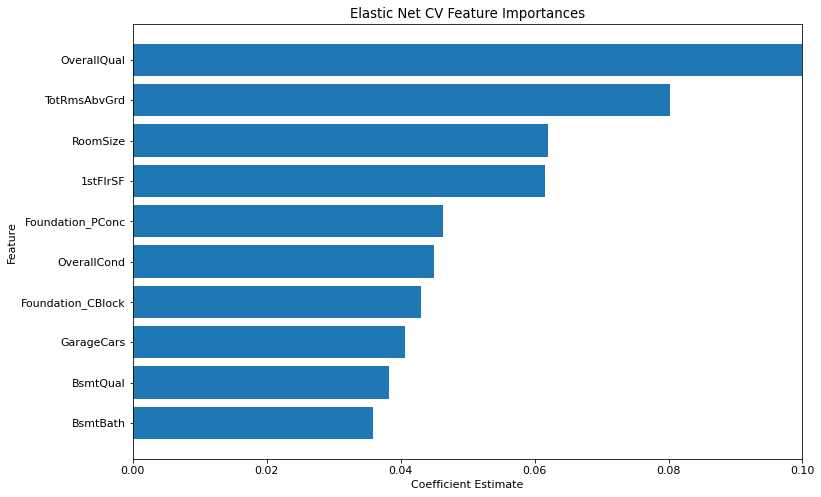

In [202]:
# plotting feature importance 

enet_coeff = pd.DataFrame() 
x_train_sc = pd.DataFrame(x_train_sc)
x_train_sc.columns = x_train.columns
enet_coeff['Feature'] = x_train_sc.columns
enet_coeff['Coefficient Estimate'] = pd.Series(enet_cv.best_estimator_.coef_)
enet_coeff = enet_coeff.sort_values('Coefficient Estimate', ascending=True)
# new_coeff = pd.concat([enet_coeff[:10], enet_coeff[-10:]]).sort_values('Coefficient Estimate', ascending=True)
new_coeff = enet_coeff[-10:]

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.barh(new_coeff['Feature'], new_coeff['Coefficient Estimate'])
plt.title('Elastic Net CV Feature Importances')
plt.xlabel('Coefficient Estimate')
plt.ylabel('Feature')
plt.xlim(0.0, 0.1)


### `Random Forest` 

In [16]:
# using the more minimal dataset selected by Lasso Regression 
# scaling not required for random forest models - no regression coefficient analogue produced in model output 

# loading dataset 
from sklearn.model_selection import train_test_split

cl_x = pd.read_csv('../data/Ames_X2.csv')
cl_y = pd.read_csv('../data/Ames_Y2.csv')

cl_x = cl_x.drop(['Unnamed: 0'], axis=1)
cl_y = cl_y.drop(['Unnamed: 0'], axis=1)

cl_x_dummies = pd.get_dummies(cl_x, drop_first=True)
cl_x_dummies = cl_x_dummies.fillna(0)


x_train, x_test, y_train, y_test = train_test_split(cl_x_dummies, cl_y, test_size = 0.3, random_state = 0)

y_train =np.log(y_train['SalePrice'])
y_train

y_test = np.log(y_test['SalePrice'])
y_test 


841     11.608236
2329    11.289782
936     11.867799
618     12.278393
1801    12.365211
          ...    
2226    11.849398
1000    12.533576
655     12.149502
2090    12.144197
553     11.320554
Name: SalePrice, Length: 772, dtype: float64

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

forestregressor = RandomForestRegressor(n_estimators=1000, max_features=10)

forestregressor.fit(x_train,y_train)

print(f'R^2 of Train set: {forestregressor.score(x_train,y_train)}')
print(f'R^2 Test set: {forestregressor.score(x_test,y_test)}')


R^2 of Train set: 0.9834885383146488
R^2 Test set: 0.8975020507263132


In [23]:
# # Random Forest Permutation Importances 
from sklearn.base import clone
# from sklearn.ensemble._forest import _generate_unsampled_indices
# from sklearn.metrics import r2_score
# import warnings

# def mkdf(columns, importances):
#     I = pd.DataFrame(data={'Feature':columns, 'Importance':importances})
#     I = I.sort_values('Importance', ascending=False)
#     return I

# # oob score 
# def oob_regression_r2_score(rf, x_train, y_train):
#     x = x_train.values
#     y = y_train.values
    
#     n_samples = len(x)
#     n_classes = len(np.unique(y))
#     n_samples_bootstrap = 150
#     predictions = np.zeros(n_samples)
#     n_predictions = np.zeros(n_samples)
#     for tree in rf.estimators_:
#         unsampled_indices = _generate_unsampled_indices(tree.random_state, n_samples, n_samples_bootstrap)
#         tree_preds = tree.predict(x[unsampled_indices, :])
#         predictions[unsampled_indices] += tree_preds
#         n_predictions[unsampled_indices] += 1
    
#     if (n_predictions == 0).any():
#         warnings.warn("Too few trees; some variables do not have OOB scores.")
#         n_predictions[n_predictions == 0] = 1

#     predictions /= n_predictions

#     oob_score = r2_score(y, predictions)
#     return oob_score



# def permutation_importances(rf, x_train, y_train, metric):
#     baseline = metric(rf, x_train, y_train)
#     imp = []
#     for col in x_train.columns:
#         save = x_train[col].copy() 
#         x_train[col] = np.random.permutation(x_train[col])
#         m = metric(rf, x_train, y_train)
#         x_train[col] = save 
#         imp.append(baseline - m)
#     return np.array(imp)

base_rf = RandomForestRegressor(n_estimators = 1000,
                        min_samples_leaf = 1,
                        n_jobs = -1, 
                        max_features = len(x_train.columns),
                        oob_score = True,
                        random_state = 999)  # same bootstrapping samples

rf = clone(base_rf)
rf.fit(x_train, y_train)

# imp = permutation_importances(rf, x_train, y_train, oob_regression_r2_score)
# I = mkdf(x_train.columns, imp)

RandomForestRegressor(max_features=32, n_estimators=1000, n_jobs=-1,
                      oob_score=True, random_state=999)

Text(0, 0.5, 'Features')

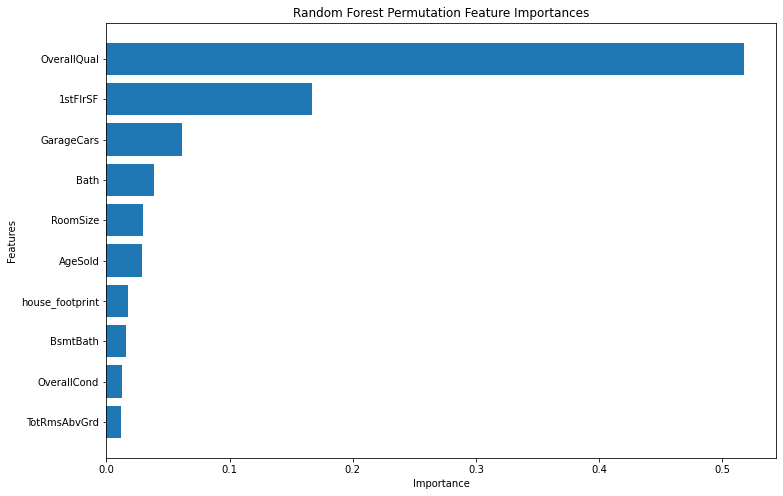

In [123]:
# I_sorted = I.sort_values(by ='Importance', ascending=True)
# plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
# plt.barh(I_sorted.Feature[-10:], I_sorted.Importance[-10:])
# plt.title('Random Forest Permutation Feature Importances')
# plt.xlabel('Importance')
# plt.ylabel('Features')

Text(0, 0.5, 'Features')

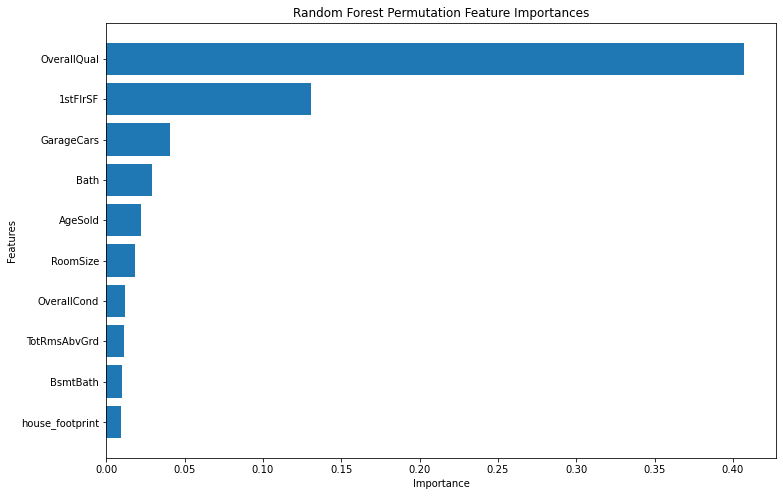

In [18]:
# using test data for validation instead of oob sample 

from sklearn.inspection import permutation_importance

result = permutation_importance(rf,
                                x_test,
                                y_test,
                                n_repeats=10,
                                random_state=42,
                                n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.barh(x_test.columns[sorted_idx[-10:]], result.importances_mean[sorted_idx[-10:]])
plt.title('Random Forest Permutation Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')


### `Random Forest with CV`

In [28]:
# set grid of parameters 
forest_para_grid = [{
    'n_estimators': [100, 500, 1000],
    'max_features': [5, 6, 7, 8],
    'criterion': ['squared_error'],
    'random_state': [0],
    'min_samples_leaf': range(1, 10),
    'min_samples_split': np.linspace(2, 30, 15, dtype=int)
}]

# set cv parameters 
rfcv = GridSearchCV(forestregressor, forest_para_grid, cv = 5, scoring='r2', n_jobs=-1)
rfcv.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=10,
                                             n_estimators=1000),
             n_jobs=-1,
             param_grid=[{'criterion': ['squared_error'],
                          'max_features': [5, 6, 7, 8],
                          'min_samples_leaf': range(1, 10),
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
                          'n_estimators': [100, 500, 1000],
                          'random_state': [0]}],
             scoring='r2')

In [20]:
print(f'Random Forest Grid Search Best Parameters: {forest_grid_search.best_params_}')

Random Forest Grid Search Best Parameters: {'criterion': 'squared_error', 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000, 'random_state': 0}


In [21]:
print(f'RF Grid Search R2 of Train set: {forest_grid_search.score(x_train, y_train)}')
print(f'RF Grid Search R2 of Test set: {forest_grid_search.score(x_test, y_test)}')

RF Grid Search R2 of Train set: 0.9837275729325385
RF Grid Search R2 of Test set: 0.8986772286176374


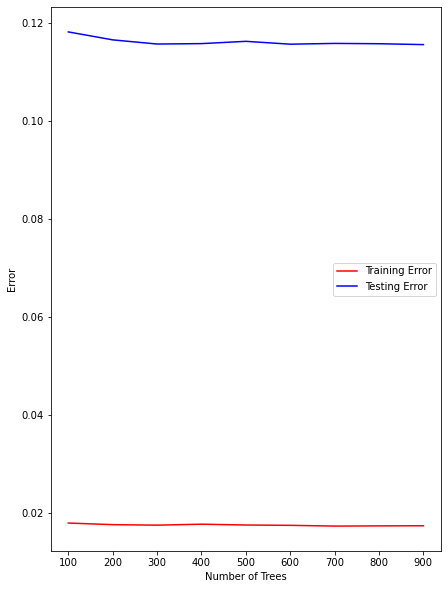

In [26]:

n_trees_range = range(100, 1000, 100)   #OOB score will warning if too few times 
train_error = [] 
test_error = [] 

for n_trees in n_trees_range: 
    rf.set_params(n_estimators=n_trees)
    rf.fit(x_train, y_train)
    train_error.append(1 - rf.score(x_train,y_train))
    test_error.append(1 - rf.score(x_test,y_test))


plt.figure(figsize = (7,10))
plt.plot(n_trees_range, train_error, c='red', label='Training Error')
plt.plot(n_trees_range, test_error, c='blue', label='Testing Error')
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.legend()
plt.show()

Text(0, 0.5, 'Features')

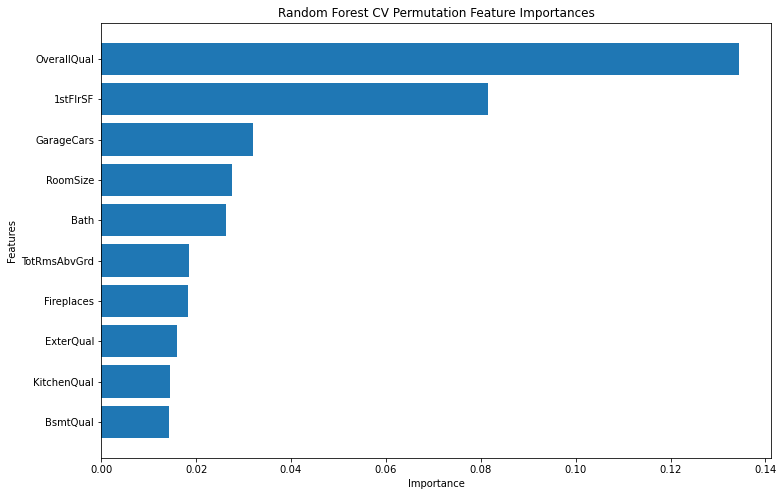

In [29]:
rfcv_result = permutation_importance(rfcv,
                                x_test,
                                y_test,
                                n_repeats=10,
                                random_state=42,
                                n_jobs=-1)

rfcv_sorted_idx = rfcv_result.importances_mean.argsort()

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.barh(x_test.columns[rfcv_sorted_idx[-10:]], rfcv_result.importances_mean[rfcv_sorted_idx[-10:]])
plt.title('Random Forest CV Permutation Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

### `Gradient Boosting`

In [34]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gb = GradientBoostingRegressor()

In [35]:
gb.set_params(
    learning_rate = 0.01,
    n_estimators = 5000,
    verbose=1,
    warm_start=False,
    loss = 'ls',
    max_features=6, 
    min_impurity_decrease=0.01,
    random_state=0
)

gb.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.1478           10.20s
         2           0.1460            7.92s
         3           0.1444            7.21s
         4           0.1428            7.03s
         5           0.1412            7.14s
         6           0.1395            8.81s
         7           0.1379            8.83s
         8           0.1362            8.83s
         9           0.1346            8.90s
        10           0.1330            8.69s
        20           0.1184            7.07s
        30           0.1054            6.25s
        40           0.0945            5.95s
        50           0.0853            5.86s
        60           0.0771            5.76s
        70           0.0700            5.80s
        80           0.0640            5.70s
        90           0.0584            5.62s
       100           0.0537            5.53s
       200           0.0278            5.11s
       300           0.0189            4.98s
       40

GradientBoostingRegressor(learning_rate=0.01, loss='ls', max_features=6,
                          min_impurity_decrease=0.01, n_estimators=5000,
                          random_state=0, verbose=1)

In [36]:
# print(f'R^2 of Train set: {gbm.score(x_train, y_train)}')
# print(f'R^2 Test set: {gbm.score(x_test, y_test)}')


# plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
# plt.barh(x_train.columns[sorted_idx[-10:]], gbm.feature_importances_[sorted_idx[-10:]])
# sorted_idx = gbm.feature_importances_.argsort()
# plt.title('Gradient Boost Feature Importances')
# plt.xlabel('Importance')
# plt.ylabel('Features')

Text(0, 0.5, 'Features')

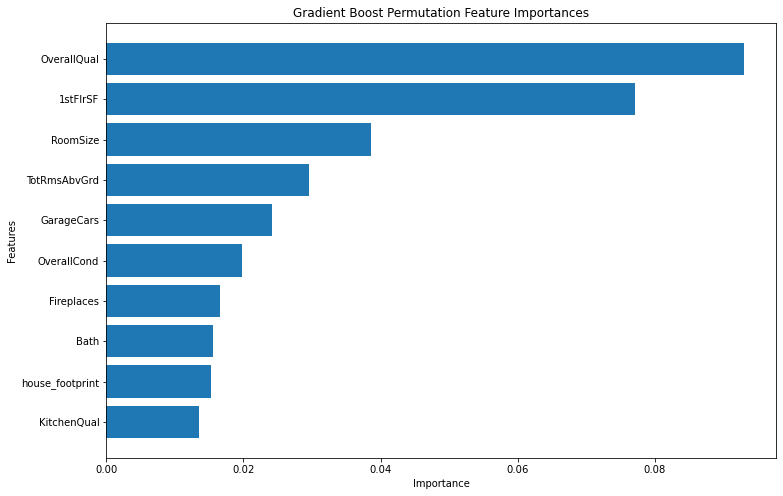

In [37]:
# Gradient Boosting Permutation Importances 
gb_result = permutation_importance(gb,
                                x_test,
                                y_test,
                                n_repeats=10,
                                random_state=42,
                                n_jobs=-1)

gb_sorted_idx = gb_result.importances_mean.argsort()

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.barh(x_test.columns[gb_sorted_idx[-10:]], gb_result.importances_mean[gb_sorted_idx[-10:]])
plt.title('Gradient Boost Permutation Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

### `XG Boosting`

In [41]:
# speed and performance enhancements from Gradient Boosting algoirthm (10x faster) 

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

print(xgboost.__version__)

1.5.0


In [42]:
xgb = XGBRegressor()
xgb.set_params(
    eta = 0.01,
    n_estimators = 5000,
    gamma=0.01,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 0
)

xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.01, gamma=0.01, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.00999999978,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=5000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
print(xgb.objective)
print()

print(f'R^2 of Train set: {xgb.score(x_train, y_train)}')
print(f'R^2 Test set: {xgb.score(x_test, y_test)}')

reg:squarederror

R^2 of Train set: 0.9922122934972577
R^2 Test set: 0.9230248806127308


In [45]:
xgb_grid = [{
    'n_estimators': range(5000,7000,500),
    'eta': [0.01],
    'random_state': [0],
    'gamma': [0.01],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'max_depth': range(2, 7, 1)
    
}]

xgb_grid_search = GridSearchCV(xgb, xgb_grid, cv = 3, scoring='r2', n_jobs=-1)

xgb_grid_search.fit(x_train, y_train)



/Users/michellebui/opt/anaconda3/envs/py3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/michellebui/opt/anaconda3/envs/py3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/michellebui/opt/anaconda3/envs/py3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/michellebui/opt/anaconda3/envs/py3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is depre

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8,
                                    enable_categorical=False, eta=0.01,
                                    gamma=0.01, gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.00999999978,
                                    max_delta_step=0, max_depth=6,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()',...
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=0.8,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             n_jobs=-1,
             param_grid=[{'colsample_bytree': [0.6, 0.7, 0.8], 'eta': [0.01],
                          'gamma': [0.01], 'max_depth': range(2, 7),
                          'n_estimators': range(5000, 7000, 500),
                          'random_state': [0], 'subsample': [0.6, 0.7, 0.8]}],
             scoring='r2')

In [46]:
print(f'XGBoost Grid Search Best Parameters: {xgb_grid_search.best_params_}')
print(f'XGBoost Grid Search R2 of Train set: {xgb_grid_search.score(x_train,y_train)}')
print(f'XGBoost Grid Search R2 of Test set: {xgb_grid_search.score(x_test,y_test)}')


XGBoost Grid Search Best Parameters: {'colsample_bytree': 0.6, 'eta': 0.01, 'gamma': 0.01, 'max_depth': 3, 'n_estimators': 6500, 'random_state': 0, 'subsample': 0.8}
XGBoost Grid Search R2 of Train set: 0.9839423523802062
XGBoost Grid Search R2 of Test set: 0.9227487320482397


/Users/michellebui/opt/anaconda3/envs/py3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/michellebui/opt/anaconda3/envs/py3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/michellebui/opt/anaconda3/envs/py3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/michellebui/opt/anaconda3/envs/py3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is depre

Text(0, 0.5, 'Features')

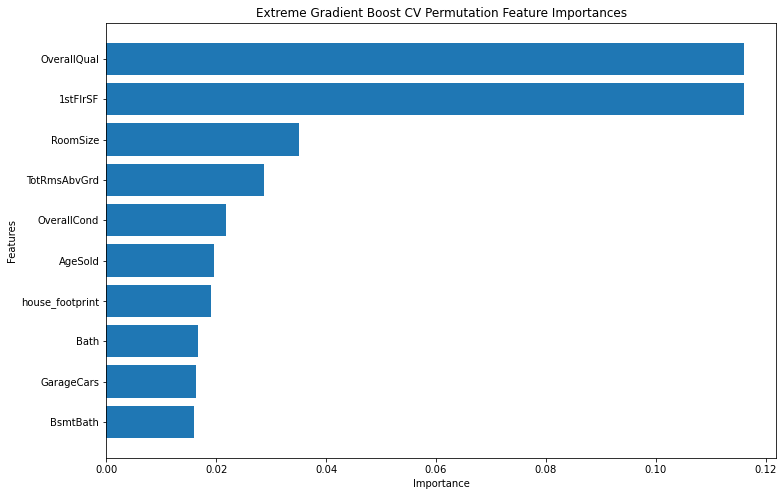

In [47]:
# Gradient Boosting Permutation Importances using best paramters found in Grid Search 

xgb = XGBRegressor()
xgb.set_params(
    n_estimators = 5500, 
    max_depth = 4,
    eta = 0.01,
    gamma=0.01,
    subsample = 0.7,
    colsample_bytree = 0.5,
    random_state = 0
)

xgb.fit(x_train, y_train)

xgb_result = permutation_importance(xgb,
                                x_test,
                                y_test,
                                n_repeats=10,
                                random_state=42,
                                n_jobs=-1)

xgb_sorted_idx = xgb_result.importances_mean.argsort()

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.barh(x_test.columns[xgb_sorted_idx[-10:]], xgb_result.importances_mean[xgb_sorted_idx[-10:]])
plt.title('Extreme Gradient Boost CV Permutation Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

# Permutation Importance gives more reliable results than previous default feature importances. The results below make more sense and agree with what we know
# about real estate. 

### `SVM`

In [48]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale features in test and train split dataset to have similar distribution 
scaler = StandardScaler().fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

# convert array to dataframe with columns 
x_train_sc = pd.DataFrame(x_train_sc, columns = x_train.columns)
x_test_sc = pd.DataFrame(x_test_sc, columns = x_test.columns)

In [49]:
# Training SVR Model 
svr = SVR(epsilon = 1e-4, gamma=0.01, kernel='rbf')
svr.fit(x_train_sc, y_train)

print(f'SVR R2 of Train set: {svr.score(x_train_sc,y_train)}')
print(f'SVR R2 of Test set: {svr.score(x_test_sc,y_test)}')

/Users/michellebui/opt/anaconda3/envs/py3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR R2 of Train set: 0.9350211035745686
SVR R2 of Test set: 0.9172576884404047


In [50]:
# SVR Grid Search 
grid_para_svr = {
    'C': [1,1000,2000,5000,10000],
    'gamma':[1e-9,1e-6,1e-3, 1e-2], 
    'epsilon': [0.00001, 0.0001, 0.01]
}

grid_search_svr = GridSearchCV(svr, grid_para_svr, cv=5, return_train_score = True, scoring='r2', n_jobs=-1)

%time grid_search_svr.fit(x_train_sc,np.ravel(y_train))

grid_search_svr.best_params_
print(f'SVR CV R2 of Train set: {grid_search_svr.score(x_train_sc, y_train)}')
print(f'SVR CV R2 of Test set: {grid_search_svr.score(x_test_sc, y_test)}')

CPU times: user 894 ms, sys: 573 ms, total: 1.47 s
Wall time: 6min 5s
SVR CV R2 of Train set: 0.9351539608964455
SVR CV R2 of Test set: 0.9187459902112336


/Users/michellebui/opt/anaconda3/envs/py3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Features')

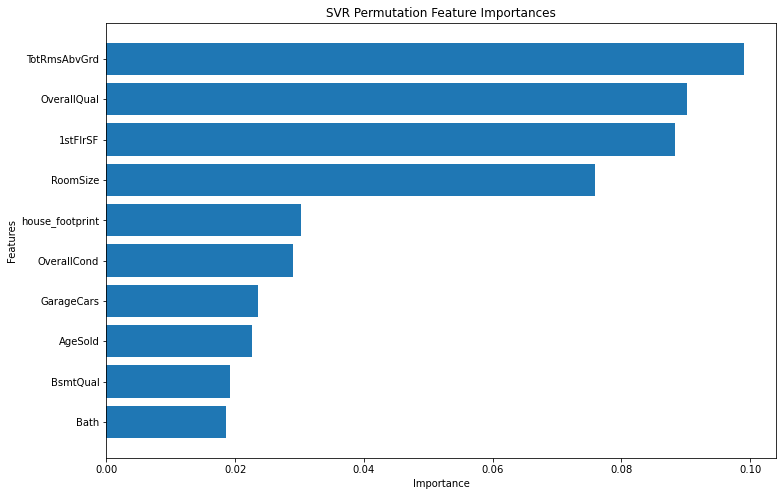

In [51]:
# SVR CV Permutation Importances 
svr = SVR(C = 1, epsilon = 0.01, gamma=0.01, kernel='rbf')
svr.fit(x_train_sc, y_train)

svr_result = permutation_importance(svr,
                                x_test_sc,
                                y_test,
                                n_repeats=10,
                                random_state=42,
                                n_jobs=-1)

svr_sorted_idx = svr_result.importances_mean.argsort()

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.barh(x_test_sc.columns[svr_sorted_idx[-10:]], svr_result.importances_mean[svr_sorted_idx[-10:]])
plt.title('SVR Permutation Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

### `Weighted Feature Importances`

In [52]:
#Formatting Importance DataFrames
def df_format(array):
        df = pd.DataFrame(array.importances_mean).T
        df.columns = x_train.columns
        df = pd.melt(df, var_name = 'Feature')
        return df

rfcv_imp = df_format(rfcv_result)
gb_imp = df_format(gb_result)
xgbcv_imp = df_format(xgb_result)
svrcv_imp = df_format(svr_result)

rfcv_score = forest_grid_search.score(x_test, y_test)
gb_score = 0.9228245887226518
xgbcv_score = 0.9223550274366806
svrcv_score = 0.9187459902112336

# Weighted permutation importances df
def weighted_importances(feat_list1, feat_list2, feat_list3, feat_list4, weight1, weight2, weight3, weight4):
    weighted_imp = []
    for i in range(len(np.array(feat_list1))):
        weighted_imp.append((np.array(feat_list1)[i][1]*weight1 + np.array(feat_list2)[i][1]*weight2 + \
        np.array(feat_list3)[i][1]*weight3 + np.array(feat_list4)[i][1]*weight4) / (weight1 + weight2 + weight3 + weight4))
    weighted_imp = pd.DataFrame(weighted_imp).T
    weighted_imp.columns = x_train.columns
    weighted_imp = pd.melt(weighted_imp, var_name = 'Feature')
    return weighted_imp

weighted_imp = weighted_importances(rfcv_imp, gb_imp, xgbcv_imp, svrcv_imp, rfcv_score, gb_score, xgbcv_score, svrcv_score)

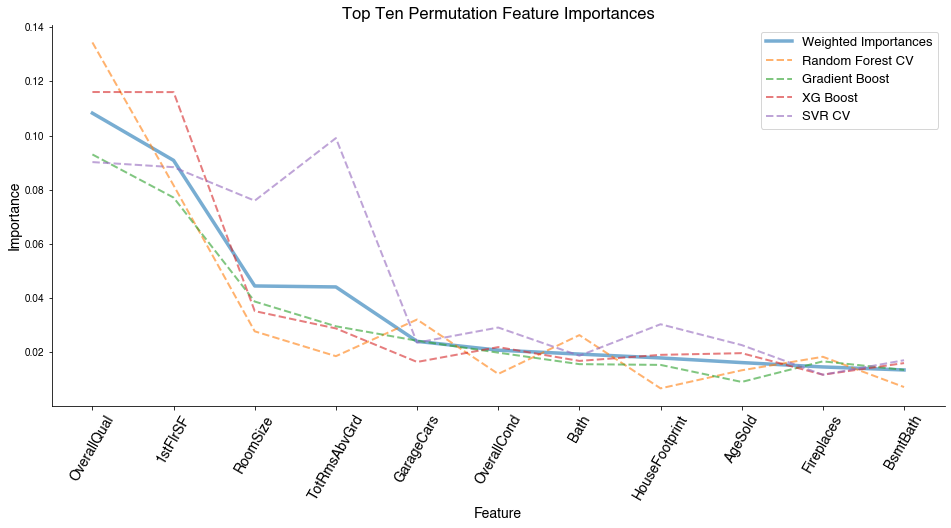

In [76]:
# Sort Descending 
rfcv_imp['weighted_imp'] = weighted_imp['value']
gb_imp['weighted_imp'] = weighted_imp['value']
xgbcv_imp['weighted_imp'] = weighted_imp['value']
svrcv_imp['weighted_imp'] = weighted_imp['value']

weighted_imp['Feature'] = weighted_imp['Feature'].replace('house_footprint', 'HouseFootprint')
rfcv_imp['Feature'] = rfcv_imp['Feature'].replace('house_footprint', 'HouseFootprint')
gb_imp['Feature'] = gb_imp['Feature'].replace('house_footprint', 'HouseFootprint')
xgbcv_imp['Feature'] = xgbcv_imp['Feature'].replace('house_footprint', 'HouseFootprint')
svrcv_imp['Feature'] = svrcv_imp['Feature'].replace('house_footprint', 'HouseFootprint')

weighted_imp = weighted_imp.sort_values('value', ascending=False)
rfcv_imp = rfcv_imp.sort_values('weighted_imp', ascending=False)
gb_imp = gb_imp.sort_values('weighted_imp', ascending=False)
xgbcv_imp = xgbcv_imp.sort_values('weighted_imp', ascending=False)
svrcv_imp = svrcv_imp.sort_values('weighted_imp', ascending=False)

# Plot 
fig = plt.figure(figsize=(16, 7))

plt.plot(weighted_imp['Feature'][:11], weighted_imp['value'][:11], alpha=0.6, label='Weighted Importances', linewidth = 3.5)
plt.plot(rfcv_imp['Feature'][:11], rfcv_imp['value'][:11], alpha=0.6, label='Random Forest CV', linestyle = 'dashed', linewidth = 2.0)
plt.plot(gb_imp['Feature'][:11], gb_imp['value'][:11], alpha=0.6, label='Gradient Boost', linestyle = 'dashed', linewidth = 2.0)
plt.plot(xgbcv_imp['Feature'][:11], xgbcv_imp['value'][:11], alpha=0.6, label='XG Boost', linestyle = 'dashed', linewidth = 2.0)
plt.plot(svrcv_imp['Feature'][:11], svrcv_imp['value'][:11], alpha=0.6, label='SVR CV', linestyle = 'dashed', linewidth = 2.0)

plt.legend(fontsize = 13)
plt.title('Top Ten Permutation Feature Importances', fontsize = 16.5)
plt.xlabel('Feature', fontsize = 14)
plt.xticks(rotation=60, fontsize = 14)
plt.ylabel('Importance', fontsize = 14)
plt.rcParams.update({'font.sans-serif':'Helvetica'})
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.show()
